In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat

In [2]:
df=pd.read_csv("Puerto_Morelos.csv", header=int(0))

In [3]:
from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'año'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)

In [4]:
df

,año,mes,dia,hora(utc),altura(mm),date
0,2016,1,1,0,1213,2016-01-01 00:00:00
1,2016,1,1,1,1326,2016-01-01 01:00:00
2,2016,1,1,2,1292,2016-01-01 02:00:00
3,2016,1,1,3,1123,2016-01-01 03:00:00
4,2016,1,1,4,858,2016-01-01 04:00:00
5,2016,1,1,5,564,2016-01-01 05:00:00
6,2016,1,1,6,316,2016-01-01 06:00:00
7,2016,1,1,7,174,2016-01-01 07:00:00
8,2016,1,1,8,180,2016-01-01 08:00:00
9,2016,1,1,9,331,2016-01-01 09:00:00


In [5]:
df.dtypes

año                    int64
mes                    int64
dia                    int64
hora(utc)              int64
altura(mm)             int64
date          datetime64[ns]
dtype: object

In [6]:
df['Altura(m)']=df['altura(mm)']/1000

In [7]:
df

,año,mes,dia,hora(utc),altura(mm),date,Altura(m)
0,2016,1,1,0,1213,2016-01-01 00:00:00,1.213
1,2016,1,1,1,1326,2016-01-01 01:00:00,1.326
2,2016,1,1,2,1292,2016-01-01 02:00:00,1.292
3,2016,1,1,3,1123,2016-01-01 03:00:00,1.123
4,2016,1,1,4,858,2016-01-01 04:00:00,0.858
5,2016,1,1,5,564,2016-01-01 05:00:00,0.564
6,2016,1,1,6,316,2016-01-01 06:00:00,0.316
7,2016,1,1,7,174,2016-01-01 07:00:00,0.174
8,2016,1,1,8,180,2016-01-01 08:00:00,0.180
9,2016,1,1,9,331,2016-01-01 09:00:00,0.331


In [8]:
df=df.drop(['año', 'mes', 'dia', 'hora(utc)','altura(mm)'], axis=1)

In [9]:
df.columns

Index(['date', 'Altura(m)'], dtype='object')

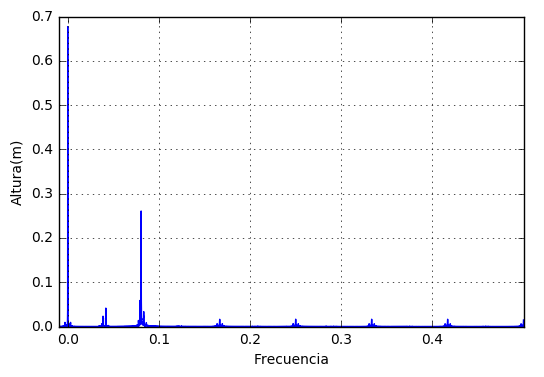

In [10]:
N = 8784
T = 1
x = df['date']
y = df['Altura(m)']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(-0.01,0.5)
plt.xlabel('Frecuencia')
plt.ylabel('Altura(m)')
plt.grid()
plt.show()

In [11]:
z = np.arange(0.0, 8784.0, 1.0)

In [12]:
df['Hora'] =  pd.Series(z, index =None)

In [13]:
df.head()

,date,Altura(m),Hora
0,2016-01-01 00:00:00,1.213,0.0
1,2016-01-01 01:00:00,1.326,1.0
2,2016-01-01 02:00:00,1.292,2.0
3,2016-01-01 03:00:00,1.123,3.0
4,2016-01-01 04:00:00,0.858,4.0


In [14]:
a = np.absolute(yf)/N
a

array([ 0.67700786,  0.03814876,  0.02094298, ...,  0.00480941,
        0.02094298,  0.03814876])

In [15]:
print(np.where(a[:,]>0.01))
b= a[a[:,]>0.01]
b

(array([   0,    1,    2,  340,  365,  367,  681,  682,  694,  696,  697,
        700,  701,  702,  703,  704,  705,  706,  707,  708,  709,  710,
        711,  712,  713,  721,  730,  731,  732,  733,  734, 1462, 1463,
       1464, 1465, 1466, 2194, 2195, 2196, 2197, 2198, 2926, 2927, 2928,
       2929, 2930, 3658, 3659, 3660, 3661, 3662, 4390, 4391, 4392, 4393,
       4394, 5122, 5123, 5124, 5125, 5126, 5854, 5855, 5856, 5857, 5858,
       6586, 6587, 6588, 6589, 6590, 7318, 7319, 7320, 7321, 7322, 8050,
       8051, 8052, 8053, 8054, 8063, 8071, 8072, 8073, 8074, 8075, 8076,
       8077, 8078, 8079, 8080, 8081, 8082, 8083, 8084, 8087, 8088, 8090,
       8102, 8103, 8417, 8419, 8444, 8782, 8783]),)


array([ 0.67700786,  0.03814876,  0.02094298,  0.02321992,  0.01941408,
        0.04152238,  0.01366845,  0.01131763,  0.05869705,  0.01847945,
        0.01148586,  0.01325013,  0.0166154 ,  0.01339441,  0.01279561,
        0.02814849,  0.04507457,  0.05609702,  0.26081043,  0.10980345,
        0.05595843,  0.02324139,  0.01470477,  0.01829482,  0.01567008,
        0.01113615,  0.01221267,  0.01839696,  0.03360433,  0.02163696,
        0.02302069,  0.01022984,  0.01477382,  0.01625594,  0.01497455,
        0.01072717,  0.01023973,  0.01470401,  0.01648686,  0.01492368,
        0.01053772,  0.01026467,  0.01466954,  0.01641664,  0.01485507,
        0.01051923,  0.0103268 ,  0.01467583,  0.01635907,  0.0147763 ,
        0.01047003,  0.01039904,  0.01471736,  0.01633959,  0.01471736,
        0.01039904,  0.01047003,  0.0147763 ,  0.01635907,  0.01467583,
        0.0103268 ,  0.01051923,  0.01485507,  0.01641664,  0.01466954,
        0.01026467,  0.01053772,  0.01492368,  0.01648686,  0.01

In [16]:
print( 'Primer Armónico notorio')
print('Amplitud=',np.absolute(yf[0,]/N))
print('frecuencia=', xf[int(4392 +0),])
print('periodo', 1/xf[int(4392+0),])

print()
print( 'Segundo Armónico notorio')
print('Amplitud=',np.absolute(yf[1,]/N))
print('frecuencia=', xf[int(4392 +1),])
print('periodo', 1/xf[int(4392+1),])

print()
print( 'Tercer Armónico notorio')
print('Amplitud=',np.absolute(yf[340,]/N))
print('frecuencia=', xf[int(4392 +340),])
print('periodo', 1/xf[int(4392+340),])

print()
print( 'Cuarto Armónico notorio')
print('Amplitud=',np.absolute(yf[367,]/N))
print('frecuencia=', xf[int(4392 +367),])
print('periodo', 1/xf[int(4392+367),])

print()
print('Quinto Armónico notorio')
print('Amplitud=',np.absolute(yf[694,]/N))
print('frecuencia=', xf[int(4392 +694),])
print('periodo', 1/xf[int(4392+694),])

print()
print('Sexto armónico notorio')
print('Amplitud=',np.absolute(yf[705,]/N))
print('frecuencia=', xf[int(4392 +705),])
print('periodo', 1/xf[int(4392+705),])

print()
print('Septimo armónico notorio')
print('Amplitud=',np.absolute(yf[706,]/N))
print('frecuencia=', xf[int(4392 +706),])
print('periodo', 1/xf[int(4392+706),])

print()
print('Octavo Armónico notorio')
print('Amplitud=',np.absolute(yf[707,]/N))
print('frecuencia=', xf[int(4392 +707),])
print('periodo', 1/xf[int(4392+707),])

print()
print( 'Noveno Armónico notorio')
print('Amplitud=',np.absolute(yf[708,]/N))
print('frecuencia=', xf[int(4392 +708),])
print('periodo', 1/xf[int(4392+708),])

print()
print( 'Decimo Armónico notorio')
print('Amplitud=',np.absolute(yf[709,]/N))
print('frecuencia=', xf[int(4392 +709),])
print('periodo', 1/xf[int(4392+709),])

print()
print( 'Onceavo Armónico notorio')
print('Amplitud=',np.absolute(yf[732,]/N))
print('frecuencia=', xf[int(4392 +732),])
print('periodo', 1/xf[int(4392+732),])

Primer Armónico notorio
Amplitud= 0.677007855191
frecuencia= 0.0
periodo inf

Segundo Armónico notorio
Amplitud= 0.0381487624098
frecuencia= 0.000113843351548
periodo 8784.0

Tercer Armónico notorio
Amplitud= 0.023219923601
frecuencia= 0.0387067395264
periodo 25.8352941176

Cuarto Armónico notorio
Amplitud= 0.0415223765615
frecuencia= 0.0417805100182
periodo 23.9346049046

Quinto Armónico notorio
Amplitud= 0.0586970473963
frecuencia= 0.0790072859745
periodo 12.6570605187

Sexto armónico notorio
Amplitud= 0.0450745728747
frecuencia= 0.0802595628415
periodo 12.4595744681

Septimo armónico notorio
Amplitud= 0.056097015053
frecuencia= 0.0803734061931
periodo 12.4419263456

Octavo Armónico notorio
Amplitud= 0.260810431593
frecuencia= 0.0804872495446
periodo 12.4243281471

Noveno Armónico notorio
Amplitud= 0.109803448021
frecuencia= 0.0806010928962
periodo 12.406779661

Decimo Armónico notorio
Amplitud= 0.0559584344848
frecuencia= 0.0807149362477
periodo 12.389280677

Onceavo Armónico notori

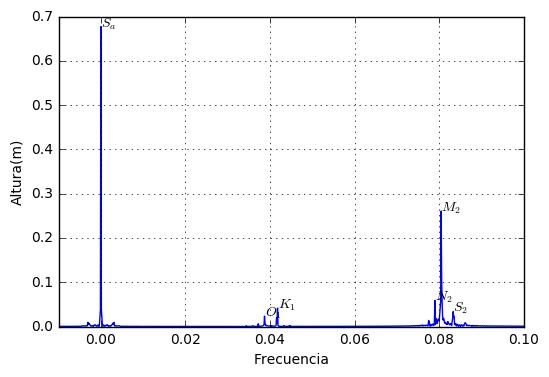

In [31]:
N = 8784
T = 1
x = df['date']
y = df['Altura(m)']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(-0.01,0.1)
plt.xlabel('Frecuencia')
plt.ylabel('Altura(m)')
plt.text(0.0, 0.677007855191,'$S_a$') #1

plt.text(0.0387067395264, 0.023219923601,'$O_1$') #3
plt.text(0.0417805100182, 0.0415223765615,'$K_1$') #4
plt.text(0.0790072859745, 0.0586970473963,'$N_2$')#5

plt.text(0.0804872495446, 0.260810431593,'$M_2$')#8

plt.text(0.0833333333333, 0.033604326702,'$S_2$')#11
plt.grid()
plt.show()

In [18]:
#Amplitud
Sa = np.absolute(yf[0,]/N)
O1 = np.absolute(yf[340,]/N)
K1 = np.absolute(yf[367,]/N)
N2 = np.absolute(yf[694,]/N)
M2 = np.absolute(yf[707,]/N)
S2 = np.absolute(yf[732,]/N)


#Frecuencia
f_Sa = xf[int(4392 +0)]
f_O1 = xf[int(4392 +340),]
f_K1 = xf[int(4392 +367),]
f_N2 = xf[int(4392 +694),]
f_M2 = xf[int(4392 +707)]
f_S2 = xf[int(4392 +732),]


#Fase
QSa = np.angle(yf[int(0),])
QO1 = np.angle(yf[int(340),])
QK1 = np.angle(yf[int(367),])
QN2 = np.angle(yf[int(694),])
QM2 = np.angle(yf[int(707),])
QS2 = np.angle(yf[int(732),])


In [29]:
w= 2.0*np.pi
a = 0
def f(t):
    return Sa + 2*(O1*np.cos(w*f_O1*t+QO1) + K1*np.cos(w *f_K1 *t+QK1) + N2*np.cos(w*f_N2*t+QN2) + M2*np.cos(w*f_M2*t+QM2) + S2*np.cos(w*f_S2*t+QS2))

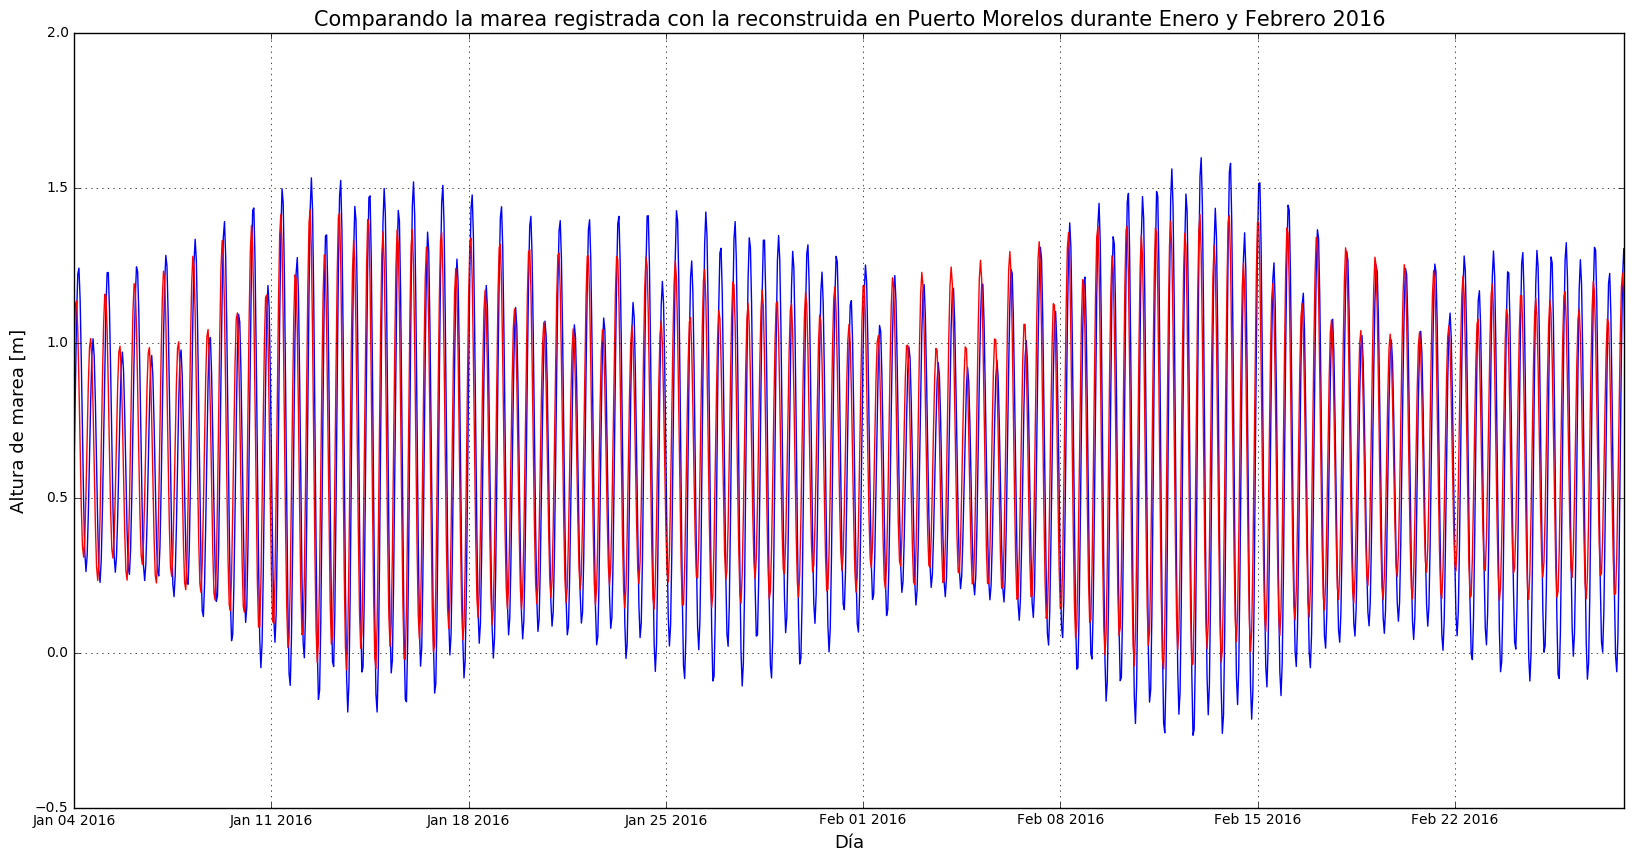

In [33]:
plt.plot(df['date'], df['Altura(m)'], 'b-', label ="Altura")
plt.plot(df['date'], f(df['Hora']), 'r-', label='Altura recosntruida')
plt.xlim(pd.Timestamp('2016-01-04 00:00:00'), pd.Timestamp('2016-02-28 00:23:00'))
plt.ylabel('Altura de marea [m]', fontsize = 13)
plt.xlabel('Día', fontsize = 13)
plt.title('Comparando la marea registrada con la reconstruida en Puerto Morelos durante Enero y Febrero 2016', fontsize= 15)
plt.grid(True) 

fig = plt.gcf()

fig.set_size_inches(20, 10)
plt.show()

In [32]:
Error = sum(abs(y-f(df['Hora']))**2) / sum(abs(y)**2)
Error

0.10848309065942305